In [1]:
# Stock Market Prediction Using Machine Learning submited by Harinandhan


# We will use the Long Short-Term Memory(LSTM) method to create a Machine Learning model to forecast Microsoft Corporation stock values. They are used to make minor changes to the information by multiplying and adding. 
# Long-term memory (LSTM) is a deep learning artificial recurrent neural network (RNN) architecture.
# We will now go to the section where we will utilize Machine Learning techniques in Python to estimate the stock value using the LSTM.


In [3]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Step 1: Importing the Libraries
# the first step is to import the libraries required to preprocess Microsoft Corporation stock data and the other libraries required for constructing and visualizing the LSTM model outputs. 
# We’ll be using the Keras library from the TensorFlow framework for this. All modules are imported from the Keras library.
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib

In [16]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib. pyplot as plt
import matplotlib

In [21]:
# Step 2: Getting to Visualising the Stock Market Prediction Data
# Using the Pandas Data Reader library, we will upload the stock data from the local system as a Comma Separated Value (.csv) file and save it to a pandas DataFrame.
# Finally, we will examine the data.
import pandas as pd
df=pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [25]:
# Step 3: Checking for Null Values by Printing the DataFrame Shape
# In this step, firstly, we will print the structure of the dataset. We’ll then check for null values in the data frame to ensure that there are none.
# The existence of null values in the dataset causes issues during training since they function as outliers, creating a wide variance in the training process.
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (9083, 7)


<Axes: >

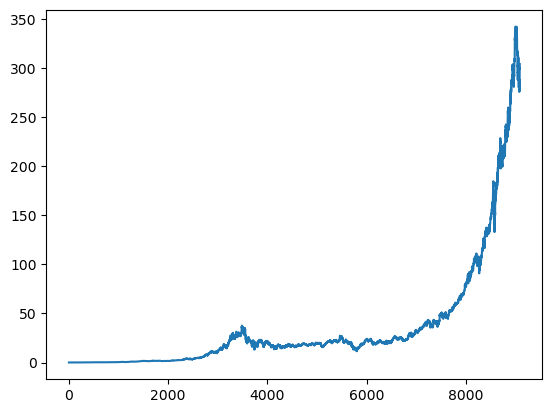

In [24]:
# Step 4: Plotting the True Adjusted Close Value
# The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. 
# This figure indicates the stock’s closing price on that particular day of stock market trading.

df['Adj Close'].plot()

In [28]:
# Step 5: Setting the Target Variable and Selecting the Features
# The output column is then assigned to the target variable in the following step. 
# It is the adjusted relative value of Microsoft Stock in this situation. Furthermore, we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:
# Open
# High
# Low
# Volume
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [30]:
from sklearn.preprocessing import MinMaxScaler


In [31]:
# Step 6: Scaling
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [33]:
from sklearn.model_selection import TimeSeriesSplit


In [34]:
# Step 7: Creating a Training Set and a Test Set for Stock Market Prediction
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [35]:
# Step 8: Data Processing For LSTM
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [38]:
from tensorflow.keras.models import Sequential


In [39]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [41]:
from tensorflow.keras.layers import LSTM


In [43]:
from tensorflow.keras.layers import Dense


In [45]:
from tensorflow.keras.utils import plot_model


In [47]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [49]:
# Step 9: Building the LSTM Model for Stock Market Prediction
# Finally, we arrive at the point when we construct the LSTM Model. In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

# We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. The model is plotted and presented below.
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [53]:
!pip install pydot
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

Defaulting to user installation because normal site-packages is not writeable
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [54]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 14.8232
Epoch 2/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 484.4350
Epoch 3/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 242.8162
Epoch 4/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 156.8417
Epoch 5/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 98.6565
Epoch 6/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 53.6949
Epoch 7/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24.2928
Epoch 8/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10.3498
Epoch 9/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1739
Epoch 10/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.2239
Epoch 11/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3262
Epoch 12/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8459
Epoch 13/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5762
Epoch 14/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4187
Epoc

In [55]:
# Step 11: Making the LSTM Prediction
# Now that we have our model ready, we can use it to forecast the Adjacent Close Value of the Microsoft stock by using a model trained using the LSTM network on the test set. 
# We can accomplish this by employing simple prediction model on the LSTM model

In [56]:
y_pred= lstm.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [57]:
# Step 12: Comparing Predicted vs True Adjusted Close Value – LSTM
# Finally, now that we’ve projected the values for the test set, 
# we can display the graph to compare both Adj Close’s true values and Adj Close’s predicted value using the LSTM Machine Learning model.

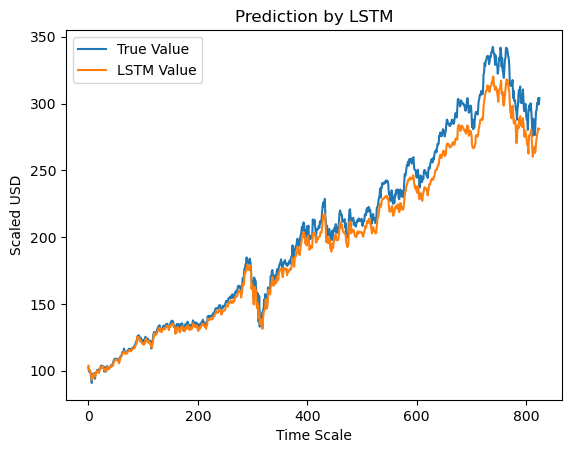

In [59]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [60]:
# The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns. 
# We may get a more accurate depiction of every specific company’s stock value by fine-tuning many parameters and adding more LSTM layers to the model.